In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [3]:
manip = ExperimentClass.Experiment("20240723_NPQ_stt71A6_bode", "SpeedZen")
manip.annotations



,E,Rep,Actinic,Ilum,HL_act
0,11,0,470,0,0
1,12,1,470,0,0
2,13,2,470,0,0
3,14,3,470,0,0
4,21,0,470,0,1
5,22,1,470,0,1
6,23,2,470,0,1
7,24,3,470,0,1


In [4]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(manip.Data[col][6])
manip.Data = manip.Data.div(normalising_vector, axis=1)

In [5]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [6]:
time_Fstat= []
time_Fmax= []
Fstat= []
Fmax= []
Phi_PSII = []
NPQ = []
for record in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{record}"])
    time_Fstat.append(aux_time_Fstat.values)
    Fstat.append(aux_Fstat.values)
    time_Fmax.append(aux_time_Fmax.values)
    Fmax.append(aux_Fmax.values)
    Phi_PSII.append((Fmax[-1]-Fstat[-1])/Fmax[-1])
    NPQ.append((Fmax[-1][0]-Fmax[-1])/Fmax[-1])

time_Fstat = np.array(time_Fstat)
time_Fmax = np.array(time_Fmax)
Fstat = np.array(Fstat)
Fmax = np.array(Fmax)
Phi_PSII = np.array(Phi_PSII)
NPQ = np.array(NPQ)


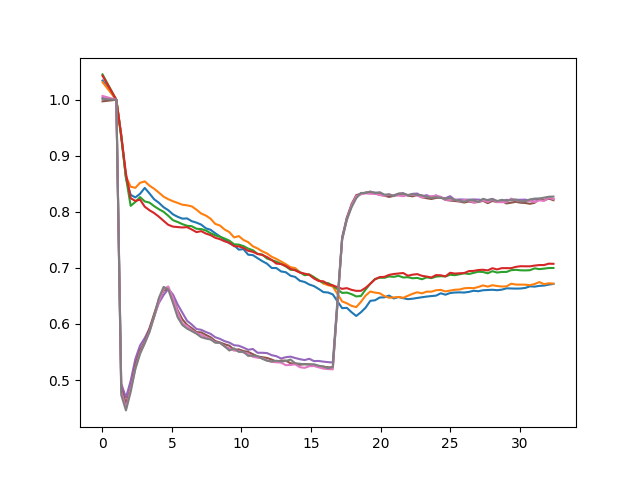

In [7]:
fig, ax = plt.subplots()
for i, rec in enumerate(manip.annotations.E):
    ax.plot(time_Fmax[i], Fmax[i])


In [14]:
def light_bar(ax, time_vector, light_on, light_off, intensity):
    scale = ax.get_ylim()[1] - ax.get_ylim()[0]
    up = ax.get_ylim()[0]
    down = up - scale*0.06
    time = np.linspace(time_vector[0], time_vector[-1], 1000)
    ax.fill_between(time, down, up, color='black', where=(time < light_on) | (time > light_off))
    ax.fill_between(time, down, up, color='yellow', where=(time >= light_on) & (time <= light_off))
    ax.axvline(light_on, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    ax.axvline(light_off, color='k', linestyle='--', alpha=0.5, linewidth=0.5)
    
    ax.text((light_off-light_on)/2, up - scale*0.035, f"{intensity} $µE m^{{-2}} s^{{-1}}$", horizontalalignment='center', verticalalignment='center', fontsize=11)
    #ax.text((light_off-light_on)/2, up - scale*0.035, "AL", horizontalalignment='center', verticalalignment='center', fontsize=11)

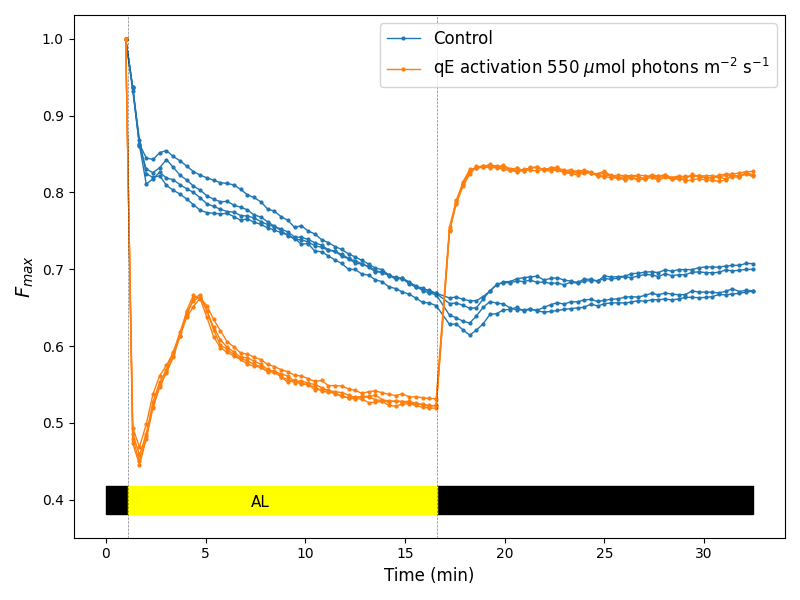

In [9]:
control = [11, 12, 13, 14]
qE = [21, 22, 23, 24]

marker = 2
line = 1

fig, ax = plt.subplots(figsize=(8, 6))
aux = 0
for i in control:
    index = list(manip.annotations.E).index(i)
    if aux == 0: 
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0", label= "Control")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0")

aux = 0    
for i in qE:
    index = list(manip.annotations.E).index(i)
    if aux == 0:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1", label= "qE activation 550 $\mu$mol photons m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1")
        

ax.legend(fontsize=12)
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.6, 220)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax.png", dpi=300)      

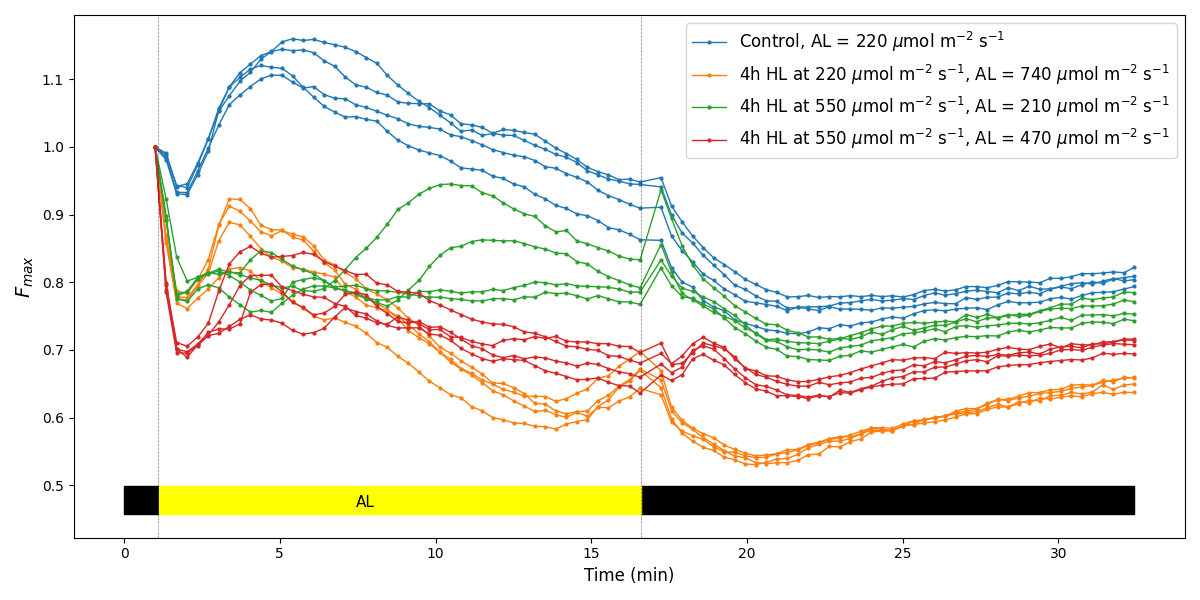

In [103]:
E8_lum2 = [61, 62, 63, 64]
E7_lum2 = [71, 72, 73, 74]

E9_lum1 = [41, 42, 43, 44]

E7_control = [11, 12, 13, 14]

marker = 2
line = 1
fig, ax = plt.subplots(figsize=(12, 6))
aux = 0
for i in E7_control:
    index = list(manip.annotations.E).index(i)
    if aux == 0: 
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0", label= "Control, AL = 220 $\mu$mol m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C0")

aux = 0    
for i in E9_lum1:
    index = list(manip.annotations.E).index(i)
    if aux == 0:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1", label= "4h HL at 220 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 740 $\mu$mol m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C1")
              
aux = 0    
for i in E7_lum2:
    index = list(manip.annotations.E).index(i)
    if aux == 0:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C2", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 210 $\mu$mol m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C2")
ax.legend(fontsize=12)    

aux = 0    
for i in E8_lum2:
    index = list(manip.annotations.E).index(i)
    if aux == 0:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C3", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 470 $\mu$mol m$^{-2}$ s$^{-1}$")
        aux = 1
    else:
        ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = line, color = "C3")
ax.legend(fontsize=12)    


ax.legend(fontsize=12, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.6, " ")

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax_all.png", dpi=300)    

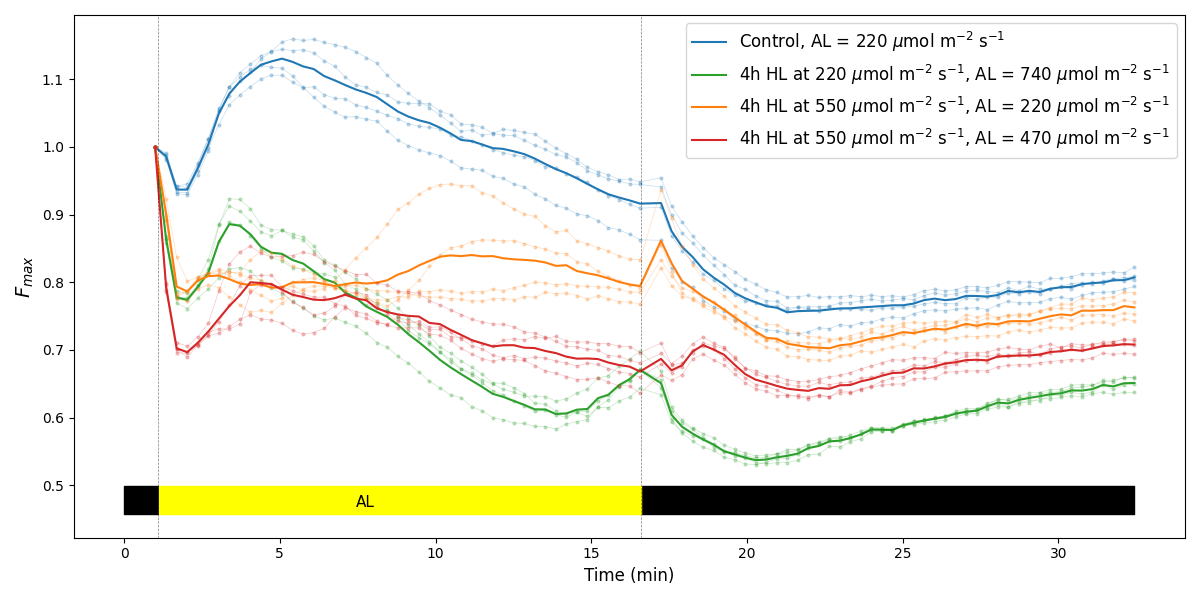

In [104]:
E8_lum2 = [61, 62, 63, 64]
E7_lum2 = [71, 72, 73, 74]

E9_lum1 = [41, 42, 43, 44]

E7_control = [11, 12, 13, 14]

marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(12, 6))
aux = 0
aux_y = []
for i in E7_control:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "Control, AL = 220 $\mu$mol m$^{-2}$ s$^{-1}$")
    

aux = 0
aux_y = []
for i in E9_lum1:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C2", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C2", label= "4h HL at 220 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 740 $\mu$mol m$^{-2}$ s$^{-1}$")


aux = 0
aux_y = []
for i in E7_lum2:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 220 $\mu$mol m$^{-2}$ s$^{-1}$")
    

aux = 0
aux_y = []
for i in E8_lum2:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C3", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C3", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$, AL = 470 $\mu$mol m$^{-2}$ s$^{-1}$")


ax.legend(fontsize=12, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.6, " ")

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax_al_avg.png", dpi=300)   

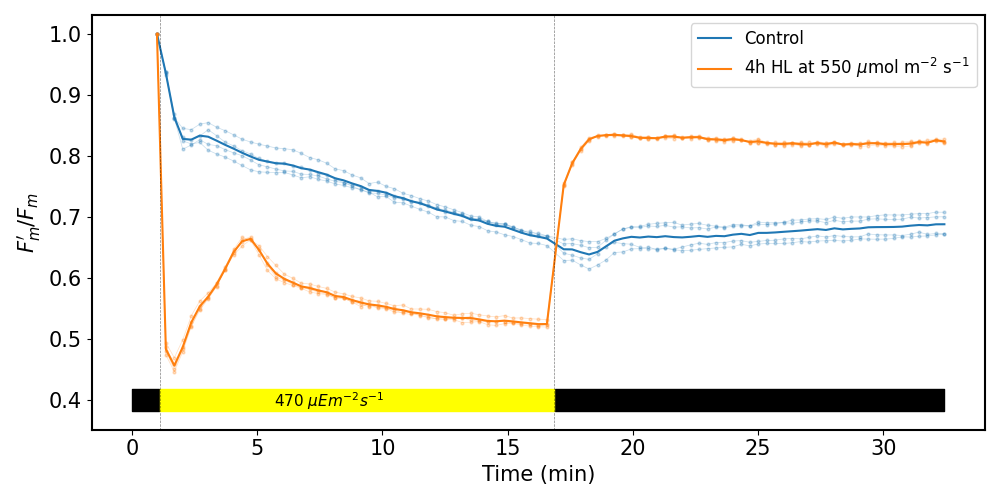

In [20]:
control = [11, 12, 13, 14]
qE = [21, 22, 23, 24]


marker = 2
line = 1.5
fig, ax = plt.subplots(figsize=(10, 5))
aux = 0
aux_y = []
for i in control:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C0", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C0", label= "Control")
    

aux = 0
aux_y = []
for i in qE:
    index = list(manip.annotations.E).index(i)
    ax.plot(time_Fmax[index][1:], Fmax[index][1:], '-o', markersize = marker, linewidth = 0.5, color = "C1", alpha=0.25)
    aux_y.append(Fmax[index][1:])
aux_y = np.array(aux_y)
ax.plot(time_Fmax[index][1:], np.mean(aux_y, axis=0), '-', linewidth = line, color = "C1", label= "4h HL at 550 $\mu$mol m$^{-2}$ s$^{-1}$")
    


ax.legend(fontsize=12, loc='upper right')
ax.set_ylabel("$F_{max}$", fontsize=14)
ax.set_xlabel("Time (min)", fontsize=12)
ax = tools.poster_axes(ax, xlabel= "Time (min)", ylabel= "$F_m'/F_m$", title="", legendfontsize=12)

light_bar(ax, time_Fmax[0], 1.1, 16.86, 470)

fig.tight_layout()
fig.savefig(manip.fig_folder + "/Fmax_comp_avg.png", dpi=300)   